In [116]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from collections import Counter
import pandas_profiling
from sklearn import metrics
import numpy as np
import seaborn as sns

In [117]:
data = pd.read_csv("train.csv", sep=",")
data.head(5) 

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [119]:
pandas_profiling.ProfileReport(data)

Number of variables,24
Number of observations,14993
Total Missing (%),0.4%
Total size in memory,2.7 MiB
Average record size in memory,192.0 B
Numeric,19
Categorical,3
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [120]:
data.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

Now I will delete all columns which I don't need. It will be State, RescuerID, VideoAmt, Description, PhotoAmt.

In [121]:
col_lst = ["State", "Name", "RescuerID", "VideoAmt", "Description", "PhotoAmt", "PetID"]
data.drop(columns=col_lst, inplace=True)

In [122]:
data.head(5)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,AdoptionSpeed
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,2
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,3
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,2
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,2


In [123]:
data.shape

(14993, 17)

In [124]:
data.drop_duplicates(inplace=True)

In [125]:
data.shape

(13720, 17)

Check the data on missing values.

In [126]:
data.isnull().sum()

Type             0
Age              0
Breed1           0
Breed2           0
Gender           0
Color1           0
Color2           0
Color3           0
MaturitySize     0
FurLength        0
Vaccinated       0
Dewormed         0
Sterilized       0
Health           0
Quantity         0
Fee              0
AdoptionSpeed    0
dtype: int64

In [127]:
from scipy import stats

In [128]:
z = np.abs(stats.zscore(data))
print(z)

[[1.04107618 0.43386772 0.59346307 ... 0.40774621 0.94361001 0.43755825]
 [1.04107618 0.54130297 0.03956975 ... 0.40774621 0.28200952 2.12127701]
 [0.9605445  0.54130297 0.72379091 ... 0.40774621 0.28200952 0.40430112]
 ...
 [1.04107618 2.62803702 0.03956975 ... 0.25784308 0.28200952 1.2461605 ]
 [1.04107618 0.48758535 0.03956975 ... 2.25461094 0.08567634 0.40430112]
 [1.04107618 0.11156196 0.05586073 ... 0.40774621 0.28200952 1.2461605 ]]


In [129]:
threshold = 3
result = np.where(z > 3)
print(result)
print(len(result[0]))

(array([    6,    13,    15, ..., 13686, 13696, 13705], dtype=int64), array([15, 14,  1, ..., 15, 13,  1], dtype=int64))
1946


In [130]:
data.shape

(13720, 17)

In [131]:
data = data[(z < 3).all(axis=1)]

In [132]:
data.shape

(11956, 17)

In [133]:
X = data.loc[:, data.columns != 'AdoptionSpeed']
Y = data["AdoptionSpeed"]

In [134]:
X.head(5)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0


In [135]:
Y.head(5)

0    2
1    0
2    3
3    2
4    2
Name: AdoptionSpeed, dtype: int64

In [136]:
model = LogisticRegression()
model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

I will use Recursive Feature Elimination to know feature ranking.

In [137]:
model = LogisticRegression()
rfe = RFE(model)
fit = rfe.fit(X, Y)
print("Num Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)


Num Features:  8
Selected Features:  [ True False False False False False False False  True  True  True  True
  True  True  True False]
Feature Ranking:  [1 5 7 9 2 3 4 6 1 1 1 1 1 1 1 8]


And now we're knowingthe ranking of all needed features. 

Type         -> 1,  
Age          -> 6,  
Breed1       -> 7,  
Breed2       -> 9,  
Gender       -> 1,  
Color1       -> 3,  
Color2       -> 5,  
Color3       -> 4,  
MaturitySize -> 1,  
FurLength    -> 1,  
Vaccinated   -> 1,  
Dewormed     -> 1,  
Sterilized   -> 1,  
Health       -> 1,  
Quantity     -> 2,  
Fee          -> 8

According to this, we can say that for people how to find a pet is important such criteria like type (cat or dog), gender, health, maturity size, fur length, if this pet is vaccinated, dewormed, sterilized.

In [138]:
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.00930314 0.1900785  0.08767076 0.07084545 0.05930509 0.10919717
 0.10601673 0.05918942 0.05110617 0.04516224 0.0348548  0.03048683
 0.03593192 0.         0.05335742 0.05749437]


Type         -> 0.008,  
Age          -> 0.223,  
Breed1       -> 0.094,  
Breed2       -> 0.065,  
Gender       -> 0.043,  
Color1       -> 0.105,  
Color2       -> 0.099,  
Color3       -> 0.049,  
MaturitySize -> 0.047,  
FurLength    -> 0.034,  
Vaccinated   -> 0.03,  
Dewormed     -> 0.031,  
Sterilized   -> 0.029,  
Health       -> 0.014,  
Quantity     -> 0.065,  
Fee          -> 0.063

In [139]:
dogs = data.loc[data['Type'] == 1]

cats = data.loc[data['Type'] == 2]

In [140]:
dogs.drop(columns=["Type"], inplace=True)
cats.drop(columns=["Type"], inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [141]:
pandas_profiling.ProfileReport(dogs)

Number of variables,17
Number of observations,5818
Total Missing (%),0.0%
Total size in memory,772.8 KiB
Average record size in memory,136.0 B
Numeric,16
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [142]:
pandas_profiling.ProfileReport(cats)

Number of variables,17
Number of observations,6138
Total Missing (%),0.0%
Total size in memory,815.3 KiB
Average record size in memory,136.0 B
Numeric,16
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [143]:
dogs.shape

(5818, 16)

In [144]:
cats.shape

(6138, 16)

Like we see from the shape. From overall dataset, dogs have 54.23% and cats have 45.77%. Now we can say that according to this dataset there are more dogs in a shelter than cats.

After that I want to know why some pet have hight adopt speed.

In [145]:
dogs["AdoptionSpeed"].unique()

array([3, 2, 1, 4, 0], dtype=int64)

In [146]:
cats["AdoptionSpeed"].unique()

array([2, 0, 1, 4, 3], dtype=int64)

Like you see feature 'AdoptionSpeed' have 5 values. It's  4,3 -> high adoption speed and 2,1,0 -> low adoption speed. 

In [147]:
dogs_with_high_adoption_speed = dogs.loc[(dogs['AdoptionSpeed'] == 4) | (dogs['AdoptionSpeed'] == 3)]
cats_with_high_adoption_speed = cats.loc[(cats['AdoptionSpeed'] == 4) | (cats['AdoptionSpeed'] == 3)]

dogs_with_low_adoption_speed = dogs.loc[(dogs['AdoptionSpeed'] == 1) | (dogs['AdoptionSpeed'] == 2) | (dogs['AdoptionSpeed'] == 0)]
cats_with_low_adoption_speed = cats.loc[(cats['AdoptionSpeed'] == 1) | (cats['AdoptionSpeed'] == 2) | (cats['AdoptionSpeed'] == 0)]

In [148]:
dogs_with_high_adoption_speed.shape

(3175, 16)

In [149]:
dogs_with_low_adoption_speed.shape

(2643, 16)

In [150]:
cats_with_high_adoption_speed.shape

(2759, 16)

In [151]:
cats_with_low_adoption_speed.shape

(3379, 16)

After dividing data on high and low adoption speed we can see that high adoption speed have 53.65% of dogs, in accordance 46.35% have low adoption speed. Cats have a different situation. 45% have high adoption speed and  55% have low.

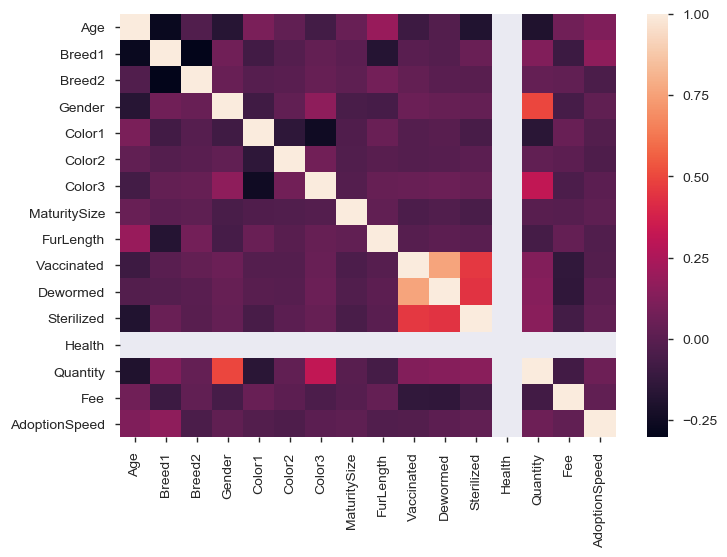

In [152]:
corr = dogs_with_high_adoption_speed.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

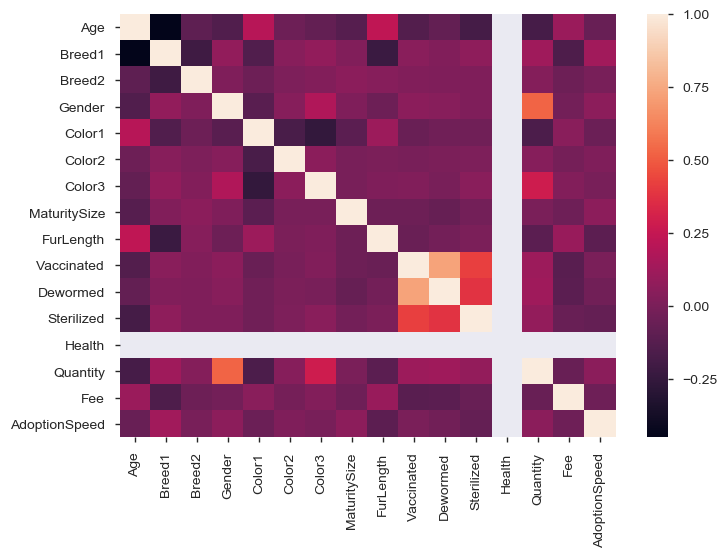

In [153]:
corr = dogs_with_low_adoption_speed.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

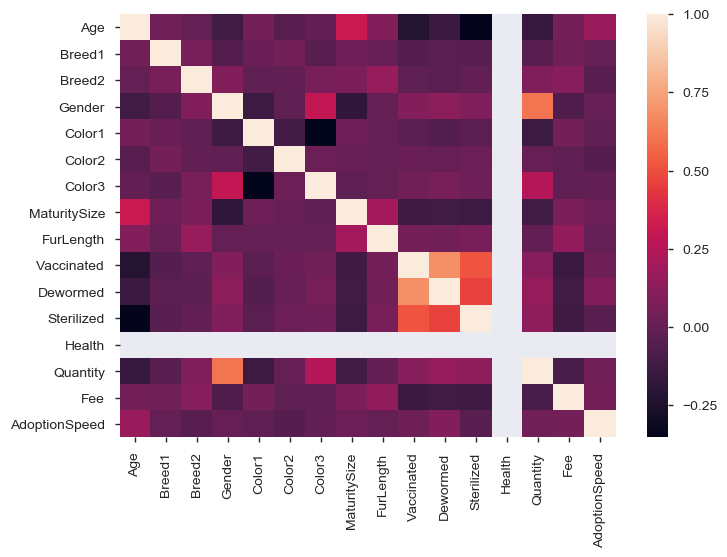

In [154]:
corr = cats_with_high_adoption_speed.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

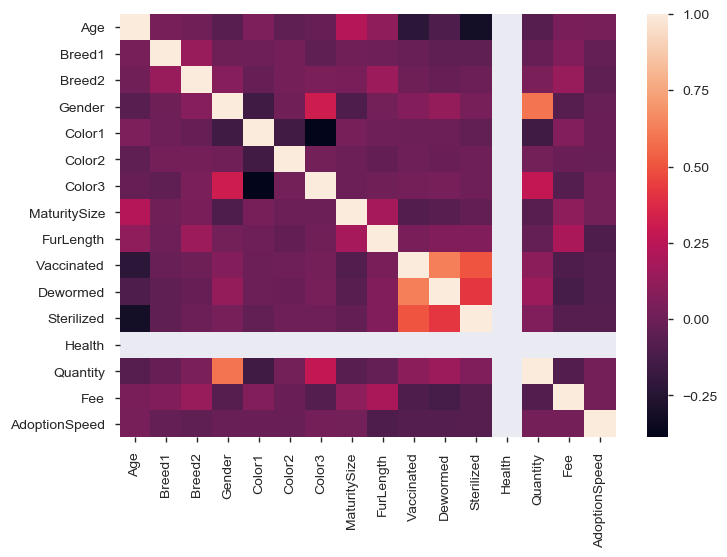

In [155]:
corr = cats_with_low_adoption_speed.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [156]:
Counter(dogs_with_high_adoption_speed['Breed1'])

Counter({307: 2653,
         189: 19,
         205: 37,
         128: 25,
         207: 6,
         195: 20,
         103: 30,
         109: 37,
         213: 44,
         218: 68,
         141: 70,
         129: 2,
         173: 9,
         200: 6,
         119: 13,
         152: 25,
         233: 1,
         239: 6,
         231: 3,
         179: 31,
         154: 1,
         93: 1,
         224: 1,
         117: 6,
         182: 5,
         187: 1,
         227: 2,
         206: 6,
         176: 1,
         102: 3,
         111: 1,
         203: 1,
         122: 1,
         150: 2,
         147: 3,
         97: 2,
         88: 1,
         204: 2,
         188: 1,
         83: 1,
         202: 3,
         199: 2,
         178: 4,
         169: 3,
         185: 3,
         82: 1,
         130: 1,
         146: 1,
         132: 2,
         105: 2,
         114: 1,
         217: 1,
         98: 1,
         143: 1,
         215: 1,
         237: 1})

In [157]:
Counter(dogs_with_low_adoption_speed['Breed1'])

Counter({307: 1905,
         205: 71,
         141: 96,
         189: 36,
         119: 14,
         109: 71,
         179: 83,
         218: 71,
         128: 23,
         200: 7,
         213: 35,
         195: 29,
         202: 3,
         103: 45,
         185: 2,
         139: 1,
         206: 10,
         102: 3,
         182: 10,
         145: 2,
         178: 10,
         82: 1,
         169: 10,
         155: 3,
         215: 1,
         147: 9,
         108: 2,
         152: 28,
         240: 2,
         83: 5,
         173: 8,
         224: 2,
         105: 2,
         234: 1,
         207: 11,
         187: 2,
         114: 1,
         148: 2,
         237: 1,
         239: 2,
         117: 5,
         125: 1,
         129: 1,
         167: 2,
         190: 2,
         203: 1,
         111: 1,
         98: 1,
         197: 1,
         233: 1,
         85: 1,
         188: 1,
         228: 1,
         150: 1,
         99: 1,
         204: 1,
         81: 1})

In [158]:
Counter(cats_with_high_adoption_speed['Breed1'])

Counter({265: 494,
         266: 1544,
         243: 44,
         250: 9,
         299: 139,
         285: 55,
         303: 14,
         264: 94,
         305: 6,
         306: 25,
         247: 21,
         292: 83,
         286: 1,
         277: 3,
         254: 57,
         242: 5,
         294: 4,
         283: 38,
         270: 1,
         295: 8,
         304: 3,
         262: 2,
         272: 2,
         241: 14,
         289: 5,
         276: 9,
         249: 10,
         267: 1,
         248: 1,
         251: 10,
         284: 5,
         256: 1,
         300: 8,
         296: 3,
         282: 4,
         293: 1,
         257: 1,
         252: 9,
         263: 1,
         273: 3,
         253: 3,
         246: 1,
         279: 2,
         245: 1,
         297: 1,
         244: 1,
         260: 1,
         288: 2,
         268: 3,
         307: 4,
         274: 1,
         301: 1})

In [159]:
Counter(cats_with_low_adoption_speed['Breed1'])

Counter({299: 178,
         265: 663,
         266: 1692,
         264: 175,
         285: 113,
         292: 160,
         254: 44,
         283: 30,
         288: 12,
         248: 1,
         247: 42,
         243: 40,
         296: 1,
         300: 12,
         289: 18,
         306: 28,
         305: 2,
         267: 2,
         268: 3,
         251: 21,
         282: 8,
         241: 12,
         249: 7,
         273: 3,
         293: 2,
         295: 4,
         303: 27,
         252: 12,
         280: 1,
         272: 2,
         274: 3,
         276: 17,
         304: 4,
         263: 1,
         244: 2,
         253: 1,
         281: 2,
         250: 5,
         218: 1,
         277: 4,
         242: 4,
         301: 3,
         260: 1,
         270: 1,
         297: 3,
         256: 1,
         262: 1,
         205: 1,
         269: 1,
         246: 2,
         284: 1,
         271: 3,
         302: 1,
         287: 1})

Dogs with high adoption speed:                                                                                                    
307 - 78%                                                                                                                        
218, 205, 213, 109, 141, 179 - 9%                                                                                                 
another - 13%                                                                                                                   

Dogs with low adoption speed:                                                                                                                       
307 - 66%                                                                                                                                     
205, 141, 189, 109, 179, 218, 103 - 16%

another - 18 %

Cats with high adoption speed:

265 - 17%

266 - 55%

243, 299, 285, 264, 292, 254 - 17%

another - 11%

Cats with low adoption speed:

266 - 50%

265 - 19%

187, 189, 149, 173 - 18%

another - 13%

*In poster I will show not the breed ID like here, but their names. 

In [160]:
Counter(dogs_with_high_adoption_speed['Gender'])

Counter({1: 1071, 2: 1730, 3: 374})

In [161]:
Counter(dogs_with_low_adoption_speed['Gender'])

Counter({2: 1306, 1: 1062, 3: 275})

In [162]:
Counter(cats_with_high_adoption_speed['Gender'])

Counter({2: 1255, 3: 578, 1: 926})

In [163]:
Counter(cats_with_low_adoption_speed['Gender'])

Counter({1: 1280, 2: 1479, 3: 620})

Dogs with high adoption speed:

male: 33%

female: 55%

unknown: 12%

Dogs with low adoption speed:

male: 41%

female: 48%

unknown: 11%

Cats with high adoption speed:

male: 34%

female: 44%

unknown: 22%

Cats with low adoption speed:

male: 38%

female: 43%

unknown: 19%

In [164]:
Counter(dogs_with_high_adoption_speed['Color1'])

Counter({2: 1077, 1: 1497, 6: 28, 5: 213, 7: 146, 3: 136, 4: 78})

In [165]:
Counter(dogs_with_low_adoption_speed['Color1'])

Counter({1: 1290, 2: 780, 5: 233, 7: 143, 3: 125, 4: 37, 6: 35})

In [166]:
Counter(cats_with_high_adoption_speed['Color1'])

Counter({1: 1467, 2: 436, 7: 98, 4: 208, 5: 92, 3: 222, 6: 236})

In [167]:
Counter(cats_with_low_adoption_speed['Color1'])

Counter({1: 1632, 5: 177, 6: 299, 2: 560, 3: 318, 4: 227, 7: 166})

In [168]:
Counter(dogs_with_high_adoption_speed['MaturitySize'])

Counter({2: 2492, 3: 259, 1: 424})

In [169]:
Counter(dogs_with_low_adoption_speed['MaturitySize'])

Counter({2: 1934, 3: 270, 1: 439})

In [170]:
Counter(cats_with_high_adoption_speed['MaturitySize'])

Counter({2: 1730, 1: 821, 3: 208})

In [171]:
Counter(cats_with_low_adoption_speed['MaturitySize'])

Counter({1: 1117, 2: 2024, 3: 238})

In [172]:
Counter(dogs_with_high_adoption_speed['FurLength'])

Counter({2: 1152, 1: 1939, 3: 84})

In [173]:
Counter(dogs_with_low_adoption_speed['FurLength'])

Counter({1: 1436, 3: 145, 2: 1062})

In [174]:
Counter(cats_with_high_adoption_speed['FurLength'])

Counter({2: 940, 1: 1702, 3: 117})

In [175]:
Counter(cats_with_low_adoption_speed['FurLength'])

Counter({1: 1941, 2: 1204, 3: 234})

In [176]:
Counter(dogs_with_high_adoption_speed['Vaccinated'])

Counter({1: 1628, 2: 1081, 3: 466})

In [177]:
Counter(dogs_with_low_adoption_speed['Vaccinated'])

Counter({1: 1135, 2: 1139, 3: 369})

In [178]:
Counter(cats_with_high_adoption_speed['Vaccinated'])

Counter({3: 285, 1: 953, 2: 1521})

In [179]:
Counter(cats_with_low_adoption_speed['Vaccinated'])

Counter({2: 2245, 3: 295, 1: 839})

In [180]:
Counter(dogs_with_high_adoption_speed['Dewormed'])

Counter({1: 1965, 2: 752, 3: 458})

In [181]:
Counter(dogs_with_low_adoption_speed['Dewormed'])

Counter({1: 1539, 2: 762, 3: 342})

In [182]:
Counter(cats_with_high_adoption_speed['Dewormed'])

Counter({3: 263, 1: 1494, 2: 1002})

In [183]:
Counter(cats_with_low_adoption_speed['Dewormed'])

Counter({2: 1468, 3: 276, 1: 1635})

In [184]:
Counter(dogs_with_high_adoption_speed['Sterilized'])

Counter({2: 1758, 1: 917, 3: 500})

In [185]:
Counter(dogs_with_low_adoption_speed['Sterilized'])

Counter({2: 1886, 3: 323, 1: 434})

In [186]:
Counter(cats_with_high_adoption_speed['Sterilized'])

Counter({3: 306, 1: 693, 2: 1760})

In [187]:
Counter(cats_with_low_adoption_speed['Sterilized'])

Counter({2: 2642, 3: 305, 1: 432})

*All percentages you can also see in the poster